In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Import modules


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## loading the dataset

In [3]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## exploratory data analysis

<Axes: xlabel='Survived', ylabel='count'>

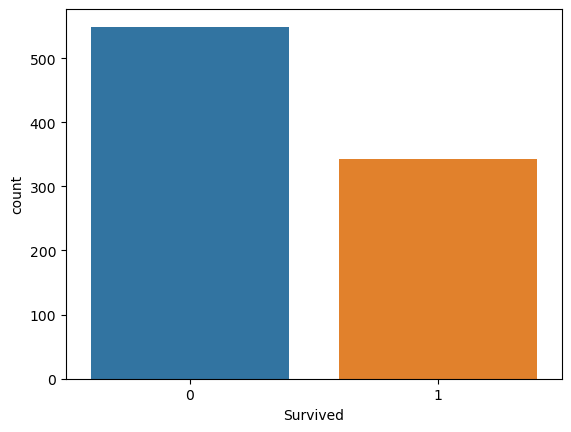

In [6]:
sns.countplot(x=train['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

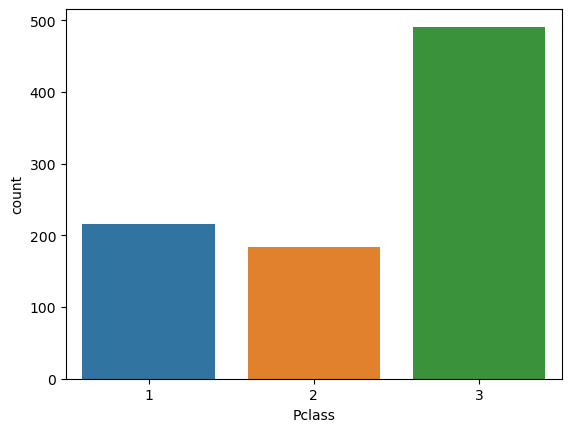

In [7]:
sns.countplot(x=train['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

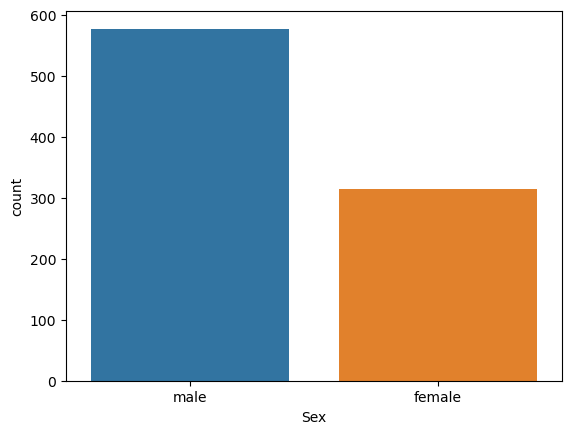

In [8]:
sns.countplot(x=train['Sex'])

<Axes: xlabel='SibSp', ylabel='count'>

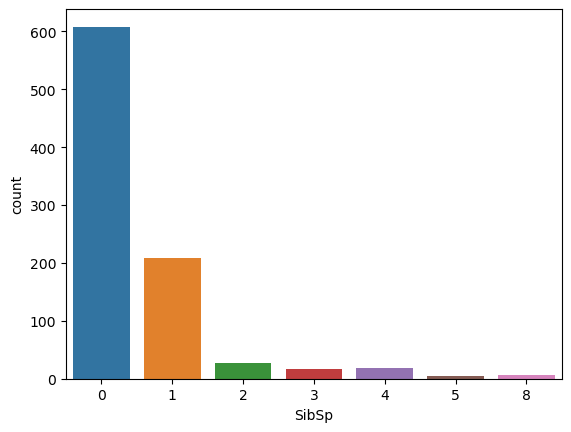

In [9]:
sns.countplot(x=train['SibSp'])

<Axes: xlabel='Parch', ylabel='count'>

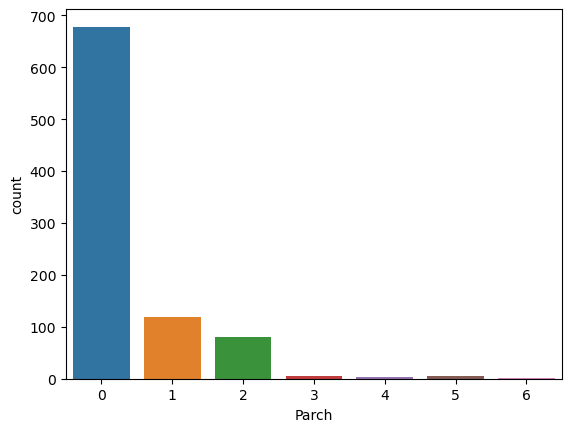

In [10]:
sns.countplot(x=train['Parch'])

<Axes: xlabel='Embarked', ylabel='count'>

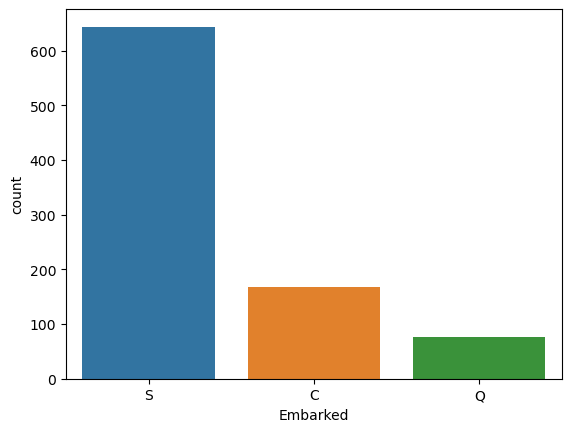

In [11]:
sns.countplot(x=train['Embarked'])

<Axes: xlabel='Age', ylabel='Density'>

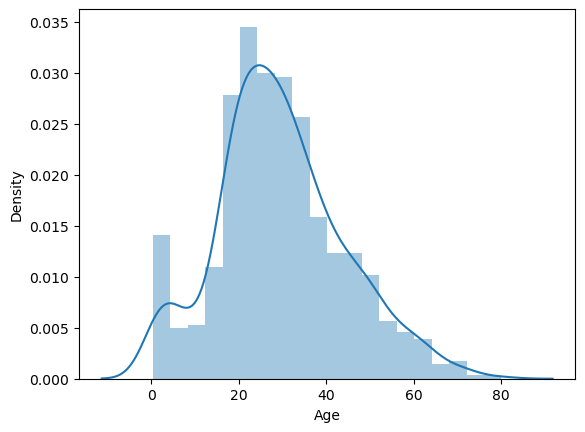

In [12]:
sns.distplot(train['Age'])

<Axes: ylabel='Density'>

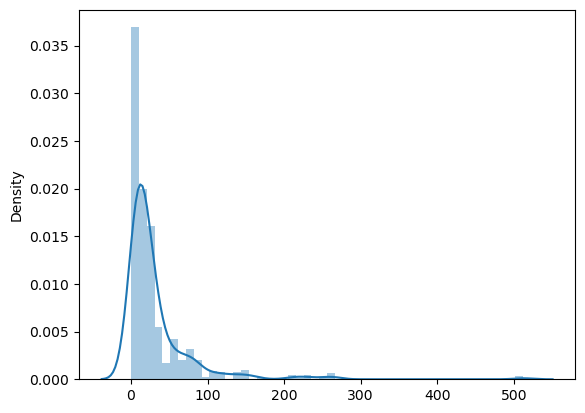

In [13]:
sns.distplot(x=train['Fare'])

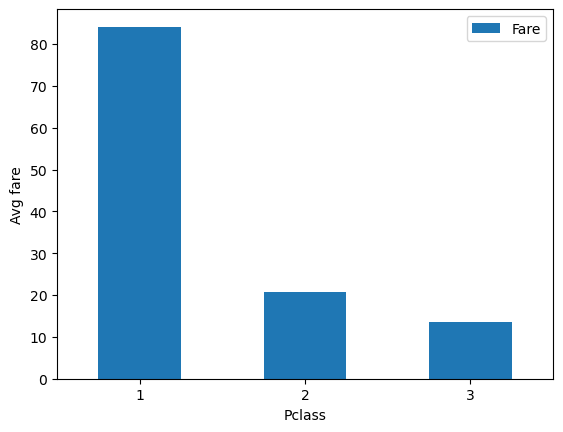

In [14]:
class_Fare=train.pivot_table(index='Pclass',values='Fare')
class_Fare.plot(kind='bar')
plt.ylabel("Avg fare")
plt.xticks(rotation=0)
plt.show()

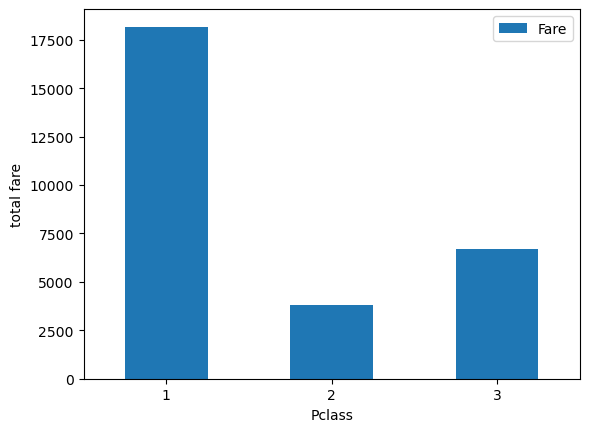

In [15]:
class_Fare=train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_Fare.plot(kind='bar')
plt.ylabel("total fare")
plt.xticks(rotation=0)
plt.show()

## data preprocessing

In [16]:
train_len=len(train)
train_len

891

In [17]:
df=pd.concat([train,test],axis=0)
df=df.reset_index()

df.head()


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
len(df)

1309

In [19]:
df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [20]:
df=df.drop(columns=['Cabin'],axis=1)
# dropping the cabin coloumn because it has large number of the null data

In [21]:
df['Age'].mean()

29.881137667304014

In [22]:
#fill null values with the mean ofthe coloumn
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
#for missing values ofthe catagorical coloumn fill those missing values with the mode ofthat colouymn
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [23]:
df.isnull().sum()

index            0
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

<Axes: ylabel='Density'>

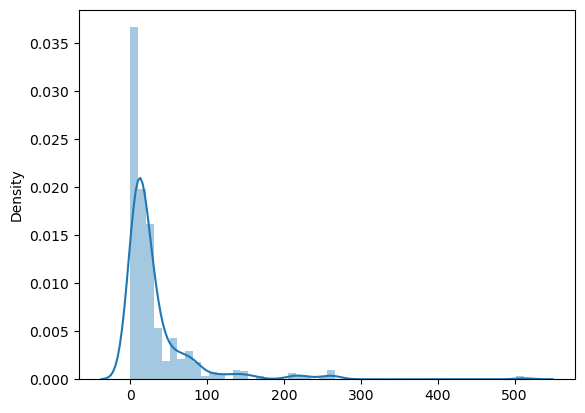

In [24]:
# log transformation for uniform distribution ofthe fare coloumn to make the fare 
sns.distplot(x=df['Fare'])

In [25]:
df['Fare']=np.log(df['Fare']+1)

<Axes: ylabel='Density'>

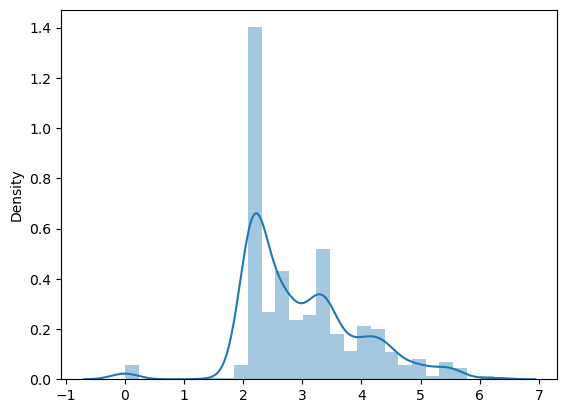

In [26]:
sns.distplot(x=df['Fare'])

In [27]:
df.corr()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
index,1.000000,0.170654,-0.005007,-0.018212,0.011477,-0.027343,0.003911,-0.013681
PassengerId,0.170654,1.000000,-0.005007,-0.038354,0.025731,-0.055224,0.008942,0.020159
Survived,-0.005007,-0.005007,1.000000,-0.338481,-0.070323,-0.035322,0.081629,0.329862
Pclass,-0.018212,-0.038354,-0.338481,1.000000,-0.366371,0.060832,0.018322,-0.685333
Age,0.011477,0.025731,-0.070323,-0.366371,1.000000,-0.190747,-0.130872,0.174203
SibSp,-0.027343,-0.055224,-0.035322,0.060832,-0.190747,1.000000,0.373587,0.311334
Parch,0.003911,0.008942,0.081629,0.018322,-0.130872,0.373587,1.000000,0.323252
Fare,-0.013681,0.020159,0.329862,-0.685333,0.174203,0.311334,0.323252,1.000000


In [28]:
df=df.drop(columns=['index'],axis=1)

<Axes: >

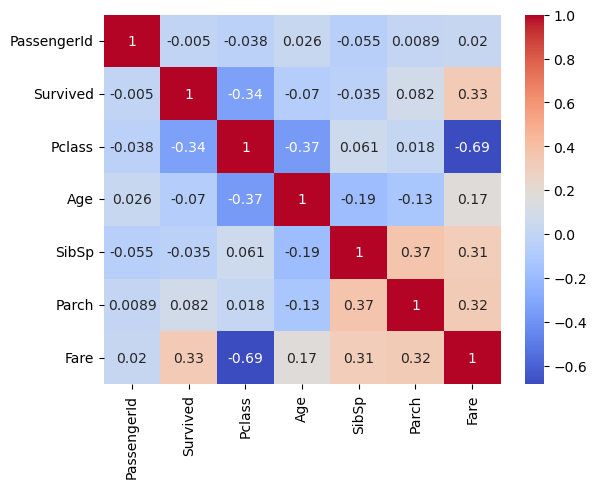

In [29]:
corr=df.corr()
# plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [31]:
df=df.drop(columns=['Name','Ticket'],axis=1)
# dropping unnecessary coloumns

In [32]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


In [33]:
## label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Sex','Embarked']
for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


## train test split

In [34]:
traindat=df.iloc[:train_len,:]
testdat=df.iloc[train_len:,:]

In [35]:
traindat.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [36]:
testdat.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [37]:
x=traindat.drop(columns=['PassengerId','Survived'])
y=traindat['Survived']
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [38]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

## model training

In [39]:
from sklearn.model_selection import train_test_split,cross_val_score
#classify funtion which is defined by us to cheack the accuracy
def classify(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy: ",model.score(x_test,y_test))    
    print(cross_val_score(model,x,y,cv=5))
    print("Cross validation score is:",np.mean(cross_val_score(model,x,y,cv=5)))

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

Accuracy:  0.8071748878923767
[0.77653631 0.78089888 0.76966292 0.76966292 0.82022472]
Cross validation score is: 0.7833971502102819


In [41]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

Accuracy:  0.7130044843049327
[0.74301676 0.76404494 0.78651685 0.74157303 0.81460674]
Cross validation score is: 0.7665997112547862


In [42]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

Accuracy:  0.8026905829596412
[0.7877095  0.79775281 0.85393258 0.7752809  0.8258427 ]
Cross validation score is: 0.817079907099366


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model)

Accuracy:  0.7757847533632287
[0.75977654 0.76404494 0.83707865 0.7752809  0.8258427 ]
Cross validation score is: 0.7991337643587972


In [44]:
from xgboost import XGBClassifier
model=XGBClassifier()
classify(model)

Accuracy:  0.7892376681614349
[0.7877095  0.81460674 0.84269663 0.78651685 0.83146067]
Cross validation score is: 0.8125980792166217


In [45]:
from lightgbm import LGBMClassifier
model= LGBMClassifier()
classify(model)

Accuracy:  0.8116591928251121
[0.79329609 0.81460674 0.86516854 0.79775281 0.84831461]
Cross validation score is: 0.8238277572029377


In [46]:
from catboost import CatBoostClassifier
model= CatBoostClassifier(verbose=0)
classify(model)

Accuracy:  0.8295964125560538
[0.81564246 0.79775281 0.84831461 0.79775281 0.85393258]
Cross validation score is: 0.8226790534178645


## **COMPLETE MODEL TRAINING WITH FULL DATA**

In [47]:
model= LGBMClassifier()
model.fit(x,y)

LGBMClassifier()

In [48]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## input df for test data

In [49]:
x_test=testdat.drop(columns=['PassengerId','Survived'],axis=1)
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


In [50]:
predictionsres=model.predict(x_test)
predictionsres

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

## **Test Submission**

In [51]:
Submit=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
Submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [52]:
Submit['Survived']=predictionsres
Submit.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,0.0


In [53]:
Submit.to_csv('Submission.csv',index=False)